In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np

In [23]:
len(os.listdir("data_images/train"))

1000

In [24]:
len(os.listdir("data_images/test"))

200

In [25]:
train = os.listdir("data_images/train")
train = random.sample(train, len(train))

In [26]:
# train = random.sample(train, 100)

In [27]:
test = os.listdir("data_images/test")
test = random.sample(test, len(test))

In [28]:
# test = random.sample(test, 20)

In [29]:
train = pd.DataFrame(train, columns=["FilePath"])
train["Label"] = ""
for i in range(len(train)):
    if train["FilePath"][i][5]=="B":
        train["Label"][i] = 1
    else:
        train["Label"][i] = 0
train["FilePath"] = ["data_images/train/" + s for s in train["FilePath"]]
train

,FilePath,Label
0,data_images/train/TEST_BIODEG_ORI_2439.jpg,1
1,data_images/train/TEST_BIODEG_ORI_2561.jpg,1
2,data_images/train/TEST_BIODEG_ORI_2417.jpg,1
3,data_images/train/TEST_BIODEG_ORI_2408.jpg,1
4,data_images/train/TEST_BIODEG_ORI_2281.jpg,1
...,...,...
995,data_images/train/TEST_BIODEG_ORI_2386.jpg,1
996,data_images/train/TEST_BIODEG_ORI_2138.jpg,1
997,data_images/train/TEST_NBIODEG_ORI_449.jpg,0
998,data_images/train/TEST_BIODEG_ORI_2485.jpg,1


In [30]:
train.Label.value_counts()

1    500
0    500
Name: Label, dtype: int64

In [31]:
test = pd.DataFrame(test, columns=["FilePath"])
test["Label"] = ""
for i in range(len(test)):
    if test["FilePath"][i][5]=="B":
        test["Label"][i] = 1
    else:
        test["Label"][i] = 0
test["FilePath"] = ["data_images/test/" + s for s in test["FilePath"]]
test

,FilePath,Label
0,data_images/test/TEST_BIODEG_ROT_69.jpg,1
1,data_images/test/TEST_NBIODEG_ORI_599.jpg,0
2,data_images/test/TEST_BIODEG_ROT_77.jpg,1
3,data_images/test/TEST_NBIODEG_ORI_522.jpg,0
4,data_images/test/TEST_NBIODEG_ORI_543.jpeg,0
...,...,...
195,data_images/test/TEST_NBIODEG_ORI_579.jpg,0
196,data_images/test/TEST_NBIODEG_ORI_565.jpg,0
197,data_images/test/TEST_BIODEG_ROT_92.jpg,1
198,data_images/test/TEST_BIODEG_ROT_39.jpg,1


In [32]:
test.Label.value_counts()

1    100
0    100
Name: Label, dtype: int64

In [33]:
train["Image"] = ""
for i in range(len(train)):
    image = cv2.imread(train["FilePath"][i])
    image = cv2.resize(image, (224,224))
    train["Image"][i] = image

In [34]:
test["Image"] = ""
for i in range(len(test)):
    image = cv2.imread(test["FilePath"][i])
    image = cv2.resize(image, (224,224))
    test["Image"][i] = image

In [35]:
x_train = []
y_train = []
x_val = []
y_val = []

for i in range(len(train)):
    x_train.append(train["Image"][i])
    y_train.append(train["Label"][i])

for i in range(len(test)):
    x_val.append(test["Image"][i])
    y_val.append(test["Label"][i])

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

img_size = 224
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

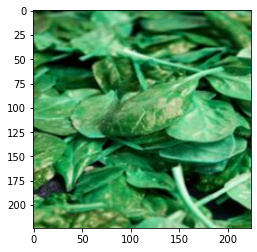

In [36]:
plt.imshow(x_train[2])

In [37]:
train["FilePath"][2]

'data_images/train/TEST_BIODEG_ORI_2417.jpg'

In [38]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [39]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [40]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\ankur\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [41]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))


Epoch 1/100


C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 44s 1s/step - loss: 0.7122 - accuracy: 0.5130 - val_loss: 0.6891 - val_accuracy: 0.5700
Epoch 2/100
32/32 [==============================] - 42s 1s/step - loss: 0.6857 - accuracy: 0.5540 - val_loss: 0.6740 - val_accuracy: 0.5650
Epoch 3/100
32/32 [==============================] - 42s 1s/step - loss: 0.6786 - accuracy: 0.5680 - val_loss: 0.6630 - val_accuracy: 0.5800
Epoch 4/100
32/32 [==============================] - 42s 1s/step - loss: 0.6681 - accuracy: 0.6100 - val_loss: 0.6535 - val_accuracy: 0.6650
Epoch 5/100
32/32 [==============================] - 42s 1s/step - loss: 0.6554 - accuracy: 0.6750 - val_loss: 0.6407 - val_accuracy: 0.6950
Epoch 6/100
32/32 [==============================] - 42s 1s/step - loss: 0.6509 - accuracy: 0.6430 - val_loss: 0.6287 - val_accuracy: 0.6550
Epoch 7/100
32/32 [==============================] - 42s 1s/step - loss: 0.6385 - accuracy: 0.6950 - val_loss: 0.6183 - val_accuracy: 0.7600
Epoch 8/100
32/32 [======

Epoch 59/100
32/32 [==============================] - 41s 1s/step - loss: 0.4207 - accuracy: 0.8030 - val_loss: 0.4195 - val_accuracy: 0.8050
Epoch 60/100
32/32 [==============================] - 40s 1s/step - loss: 0.4215 - accuracy: 0.8130 - val_loss: 0.4242 - val_accuracy: 0.8000
Epoch 61/100
32/32 [==============================] - 45s 1s/step - loss: 0.4234 - accuracy: 0.8090 - val_loss: 0.4198 - val_accuracy: 0.8050
Epoch 62/100
32/32 [==============================] - 43s 1s/step - loss: 0.4212 - accuracy: 0.8000 - val_loss: 0.4172 - val_accuracy: 0.8050
Epoch 63/100
32/32 [==============================] - 42s 1s/step - loss: 0.4170 - accuracy: 0.8130 - val_loss: 0.4207 - val_accuracy: 0.8000
Epoch 64/100
32/32 [==============================] - 42s 1s/step - loss: 0.4238 - accuracy: 0.8070 - val_loss: 0.4137 - val_accuracy: 0.8050
Epoch 65/100
32/32 [==============================] - 41s 1s/step - loss: 0.4232 - accuracy: 0.8100 - val_loss: 0.4123 - val_accuracy: 0.8100
Epoch 

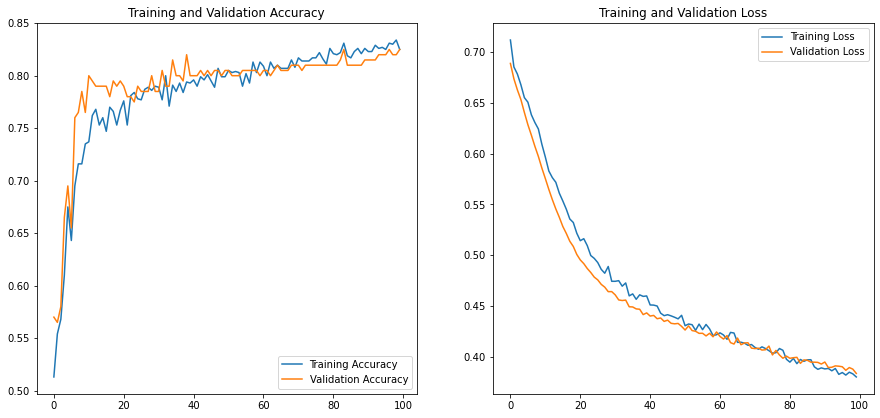

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
predict_x=model.predict(x_val)
predictions=np.argmax(predict_x,axis=1)
# predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Non-Biodegradable (0)','Biodegradable (1)']))

7/7 [==============================] - 2s 242ms/step
                       precision    recall  f1-score   support

Non-Biodegradable (0)       0.78      0.91      0.84       100
    Biodegradable (1)       0.89      0.74      0.81       100

             accuracy                           0.82       200
            macro avg       0.83      0.82      0.82       200
         weighted avg       0.83      0.82      0.82       200



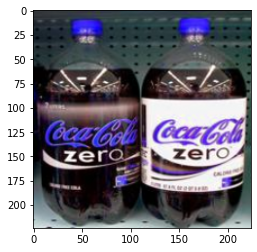

In [47]:
TEST_biodeg_sample = "data_images/TEST_BIODEG_HFL_0.jpg"
TEST_biodeg_sample = cv2.imread(TEST_biodeg_sample)
TEST_biodeg_sample = cv2.resize(image, (224,224))
TEST_biodeg_sample = np.array(TEST_biodeg_sample) / 255
x_train.reshape(-1, img_size, img_size, 1)
TEST_biodeg_sample = np.array(TEST_biodeg_sample)
plt.imshow(TEST_biodeg_sample)
plt.show()

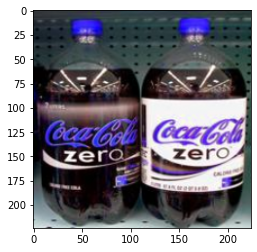

In [48]:
TEST_nbiodeg_sample = "data_images/TEST_NBIODEG_ORI_0.jpg"
TEST_nbiodeg_sample = cv2.imread(TEST_nbiodeg_sample)
TEST_nbiodeg_sample = cv2.resize(image, (224,224))
TEST_nbiodeg_sample = np.array(TEST_nbiodeg_sample) / 255
x_train.reshape(-1, img_size, img_size, 1)
TEST_nbiodeg_sample = np.array(TEST_nbiodeg_sample)
plt.imshow(TEST_nbiodeg_sample)
plt.show()

In [ ]:
plt.imshow(TEST_nbiodeg_sample)
plt.show()